# Use Decision Tree to find which Drug should be choosen based on patient's age, sex, bp, cholestero and Na_to_K

In [1]:
# import modules
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
# To see plots in notebook, run the following command
%matplotlib inline

In [26]:
# import data
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [27]:
columns=df.columns
X=df[columns[:-1]].values
y=df[columns[-1]] # the Drud column is the classificaion to build model with

In [28]:
# transfer text values to numerical, sex column
sex_code=preprocessing.LabelEncoder()
sex_code.fit(['F','M'])
X[:,1]=sex_code.transform(X[:,1])# replace the sex column with new one

In [29]:
# take a look at X
X[0:10] 

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043],
       [22, 0, 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 0, 'NORMAL', 'HIGH', 16.275],
       [41, 1, 'LOW', 'HIGH', 11.037],
       [60, 1, 'NORMAL', 'HIGH', 15.171],
       [43, 1, 'LOW', 'NORMAL', 19.368]], dtype=object)

In [31]:
#transfer text values to numericalj, BP column
BP_code=preprocessing.LabelEncoder()
BP_code.fit(['LOW','NORMAL','HIGH'])
X[:,2]=BP_code.transform(X[:,2])

In [32]:
#transfer text values to numericalj, Cholesterol column
chol_code=preprocessing.LabelEncoder()
chol_code.fit(['NORMAL','HIGH'])
X[:,3]=chol_code.transform(X[:,3])

In [33]:
# get train and test data
X_trainset, X_testset, y_trainset, y_testset=train_test_split(X,y,test_size=0.3,random_state=3)

In [37]:
# model with decision tree
drugTree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
drugTree.fit(X_trainset,y_trainset)
predTree=drugTree.predict(X_testset)

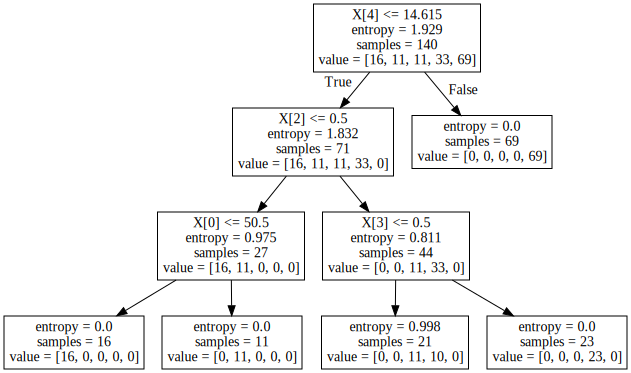

In [38]:
import graphviz
from sklearn import tree
dot_data=tree.export_graphviz(drugTree)
graph=graphviz.Source(dot_data)
graph

In [39]:
# evaluation
print('decision tree accuracy: ',metrics.accuracy_score(y_testset,predTree))

decision tree accuracy:  0.8166666666666667
